In [1]:
import pandas as pd
import geopandas as gpd
%matplotlib inline

In [2]:
def read_discharge_csv(filepath):
    unitdict = {'WNS2367':	'm3/s', 
               'WNS9086.berekende':	'm3/min'}

    header = pd.read_csv('csv/debiet.csv.zip', nrows=0, skiprows=[0], sep=';', decimal=',', na_values="-999", index_col=[0])
    df = pd.read_csv(filepath, sep=';', parse_dates=[0], skiprows=[1], infer_datetime_format=True, index_col=[0], decimal=',', na_values="-999")
    new_columns = [idx for idx, column in enumerate(df.columns) if not any(x in column for x in ['comments', 'quality'])]
    df = df.iloc[:,new_columns]
    header = header.iloc[:,new_columns]
    print(header)
    header.columns = [unit for par, unit in unitdict.items() for column in header.columns if par in column]  
    header = header.rename(columns=unitdict)
    print(header)
    for i, unit in enumerate(header.columns):
        if unit == 'm3/s':
            continue
        if unit == 'm3/min':
            df.iloc[:,i] = df.iloc[:,i] / 60 # van m3/min naar m3/s
        else:
            print('kolom {} heeft geen unit??')
    df.index = pd.to_datetime(df.index)
    return df

# SHPs
Inladen shapefiles in geopandas en samenvoegen.

In [3]:
gemaal = gpd.read_file('shp/Gemaal.shp')
gemaal = gemaal.to_crs(epsg=4326)
gemaal.head()

CODE                  NAAM    STATUSOBJE STATUSLEGG STATUSLE_1  \
0  433-036-00021    Boezemgemaal Gouda  gerealiseerd  Gewijzigd       None   
1  011-036-00021    Gemaal Bloemendaal  gerealiseerd  Gewijzigd       None   
2  249-036-00021  Gemaal De Omringdijk  gerealiseerd  Gewijzigd       None   
3  155-036-00023  Gemaal De Oude Vliet  gerealiseerd  Gewijzigd       None   
4  155-036-00022   Gemaal Het Lege End  gerealiseerd  Gewijzigd       None   

  AARDLEGGER    FUNCTIEGEM                    SOORTGEMAA  AANTALPOMP  \
0       None  Afvoergemaal  centrifugaal- of radiaalpomp           0   
1       None  Afvoergemaal        schroef- of axiaalpomp           0   
2       None  Afvoergemaal        schroef- of axiaalpomp           0   
3       None  Afvoergemaal                      onbekend           0   
4       None  Afvoergemaal        schroef- of axiaalpomp           0   

  INDICATIEW  ...  YCOORDINAA  CATEGORIEW           GEMEENTENA  \
0        Nee  ...  445813.211     primair                Gouda   
1         Ja  ...  450028.489     primair          Waddinxveen   
2         Ja  ...  453093.028     primair          Waddinxveen   
3         Ja  ...  453475.935     primair  Alphen aan den Rijn   
4         Ja  ...  453073.927     primair          Waddinxveen   

        WATERSYSTE                    POLDERNAAM  CODEPEILGE MAXCAPACIT  \
0  Arie Kwakernaak  Boezem Hollandse IJssel (RL)        None        0.0   
1     Jan Versteeg            Polder Bloemendaal      WW-32A      151.0   
2   Henry Wolswijk           Polder de Noordplas      WW-25A      260.0   
3   Henry Wolswijk              Voorofschepolder      WW-42A        0.0   
4   Henry Wolswijk              Voorofschepolder      WW-42C        0.0   

  AFSLAGPEIL                                HOOFDFUNCT  \
0        0.0                              Boezemgemaal   
1        0.0  Poldergemaal - Lozend op boezem Rijnland   
2        0.0  Poldergemaal - Lozend op boezem Rijnland   
3        0.0  Poldergemaal - Lozend op boezem Rijnland   
4        0.0  Poldergemaal - Lozend op boezem Rijnland   

                   geometry  
0  POINT (4.69575 51.99867)  
1  POINT (4.65925 52.03633)  
2  POINT (4.65373 52.06385)  
3  POINT (4.65796 52.06731)  
4  POINT (4.65454 52.06368)  

[5 rows x 49 columns]

In [4]:
meetopstelling = gpd.read_file('shp/Meetopstelling.shp')
meetopstelling = meetopstelling.to_crs(epsg=4326)
meetopstelling.head()

OBJECTID           CODE                                             NAAM  \
0       386  432-105-00001  Meetlocatie Alphen a/d Rijn - Gouwe / Oude Rijn   
1       390  433-105-00001                    Meetlocatie Boskoop - Hefbrug   
2       479  000-105-00004                            Brienenoordbrug (MSW)   
3       388  462-105-00002                Meetlocatie Heemstede - Asterkade   
4       385  462-105-00001             Meetlocatie Heemstede - Cruquiusbrug   

   STATUSOBJE      TYPEMEETOP OPMERKING  RICHTING HYPERLINK WS_BEDIENI  \
0           3  Meetnet boezem      None       0.0      None   RIJNLAND   
1           3  Meetnet boezem      None       0.0      None   RIJNLAND   
2           3    MSW (derden)      None       0.0      None        RWS   
3           3  Meetnet boezem      None       0.0      None   RIJNLAND   
4           3  Meetnet boezem      None       0.0      None   RIJNLAND   

  WS_GEWOONO WS_BUITENG  METADATAID CREATED_US  CREATED_DA LAST_EDITE  \
0   RIJNLAND   RIJNLAND           0    LRUITER  2017-06-26      DPLAS   
1   RIJNLAND   RIJNLAND           0    LRUITER  2017-06-26      DPLAS   
2        RWS        RWS           0    LRUITER  2017-06-26      DPLAS   
3   RIJNLAND   RIJNLAND           0    LRUITER  2017-06-26      DPLAS   
4   RIJNLAND   RIJNLAND           0    LRUITER  2017-06-26      DPLAS   

   LAST_EDI_1                                GLOBALID  \
0  2017-08-08  {DFAA759F-AC80-484A-B26B-2825E47D0DF4}   
1  2017-08-08  {0CBD6360-19B5-4410-A913-E46F817AEDCA}   
2  2017-06-30  {A095B37F-C912-4838-9A15-7B2B637D97C5}   
3  2017-08-08  {E5942E87-FDA9-46FA-A187-CAB4717AFE7F}   
4  2017-08-08  {8032C52B-CA7B-444D-BF35-8EAEB3FF949D}   

                   geometry  
0  POINT (4.67552 52.11870)  
1  POINT (4.66041 52.07412)  
2  POINT (4.54246 51.90524)  
3  POINT (4.60845 52.35984)  
4  POINT (4.63638 52.33844)

In [5]:
shps = gpd.GeoDataFrame(pd.concat([gemaal, meetopstelling], axis=0))
shps.head()

AANTALPOMP AARDLEGGER                       ADRES  AFSLAGPEIL BEDIENING  \
0         0.0       None  Schielands Hoge Zeedijk 71         0.0  RIJNLAND   
1         0.0       None           Henegouwerweg 101         0.0  RIJNLAND   
2         0.0       None              Linneausweg 4b         0.0  RIJNLAND   
3         0.0       None            Zuidkade t/o 101         0.0  RIJNLAND   
4         0.0       None       Linneausweg achter 4a         0.0  RIJNLAND   

                             BRON BUITENGEWO CATEGORIEW           CODE  \
0  project plan 92696 en  4612166   RIJNLAND    primair  433-036-00021   
1                            None   RIJNLAND    primair  011-036-00021   
2                            None   RIJNLAND    primair  249-036-00021   
3                            None   RIJNLAND    primair  155-036-00023   
4                            None   RIJNLAND    primair  155-036-00022   

  CODEPEILGE  ... STATUSLE_1    STATUSOBJE TYPEMEETOP       WATERSYSTE  \
0       None  ...       None  gerealiseerd        NaN  Arie Kwakernaak   
1     WW-32A  ...       None  gerealiseerd        NaN     Jan Versteeg   
2     WW-25A  ...       None  gerealiseerd        NaN   Henry Wolswijk   
3     WW-42A  ...       None  gerealiseerd        NaN   Henry Wolswijk   
4     WW-42C  ...       None  gerealiseerd        NaN   Henry Wolswijk   

  WS_BEDIENI WS_BUITENG WS_GEWOONO  XCOORDINAA  YCOORDINAA  \
0        NaN        NaN        NaN  107515.938  445813.211   
1        NaN        NaN        NaN  105050.848  450028.489   
2        NaN        NaN        NaN  104703.137  453093.028   
3        NaN        NaN        NaN  104997.431  453475.935   
4        NaN        NaN        NaN  104758.726  453073.927   

                   geometry  
0  POINT (4.69575 51.99867)  
1  POINT (4.65925 52.03633)  
2  POINT (4.65373 52.06385)  
3  POINT (4.65796 52.06731)  
4  POINT (4.65454 52.06368)  

[5 rows x 60 columns]

In [6]:
shps[shps.CODE.str.contains('433-105-00001')]

AANTALPOMP AARDLEGGER ADRES  AFSLAGPEIL BEDIENING BRON BUITENGEWO  \
1         NaN        NaN   NaN         NaN       NaN  NaN        NaN   

  CATEGORIEW           CODE CODEPEILGE  ... STATUSLE_1 STATUSOBJE  \
1        NaN  433-105-00001        NaN  ...        NaN          3   

       TYPEMEETOP WATERSYSTE WS_BEDIENI WS_BUITENG WS_GEWOONO XCOORDINAA  \
1  Meetnet boezem        NaN   RIJNLAND   RIJNLAND   RIJNLAND        NaN   

  YCOORDINAA                  geometry  
1        NaN  POINT (4.66041 52.07412)  

[1 rows x 60 columns]

# CSVs
Inladen csvs in pandas en samenvoegen.

In [7]:
debiet = read_discharge_csv('csv/debiet.csv.zip')
debiet.head()

Empty DataFrame
Columns: [WNS2367, WNS2367.1, WNS2367.2, WNS2367.3, WNS2367.4, WNS2367.5, WNS2367.6, WNS2367.7, WNS2367.8, WNS2367.9, WNS2367.10]
Index: []
Empty DataFrame
Columns: [m3/s, m3/s, m3/s, m3/s, m3/s, m3/s, m3/s, m3/s, m3/s, m3/s, m3/s]
Index: []


433-036-00021  433-036-00021_ADM  433-036-00021_pomp1  \
1996-12-01 00:00:00            NaN                0.0                  NaN   
1996-12-01 00:10:00            NaN                0.0                  NaN   
1996-12-01 00:20:00            NaN                0.0                  NaN   
1996-12-01 00:30:00            NaN                0.0                  NaN   
1996-12-01 00:40:00            NaN                0.0                  NaN   

                     433-036-00021_pomp2  433-036-00021_pomp3  \
1996-12-01 00:00:00                  NaN                  NaN   
1996-12-01 00:10:00                  NaN                  NaN   
1996-12-01 00:20:00                  NaN                  NaN   
1996-12-01 00:30:00                  NaN                  NaN   
1996-12-01 00:40:00                  NaN                  NaN   

                     011-036-00021_pomp1  011-036-00021_pomp2  \
1996-12-01 00:00:00                  NaN                  NaN   
1996-12-01 00:10:00                  NaN                  NaN   
1996-12-01 00:20:00                  NaN                  NaN   
1996-12-01 00:30:00                  NaN                  NaN   
1996-12-01 00:40:00                  NaN                  NaN   

                     246-036-00021_pomp1  249-036-00021_pomp1  \
1996-12-01 00:00:00                  NaN                  NaN   
1996-12-01 00:10:00                  NaN                  NaN   
1996-12-01 00:20:00                  NaN                  NaN   
1996-12-01 00:30:00                  NaN                  NaN   
1996-12-01 00:40:00                  NaN                  NaN   

                     249-036-00021_pomp2  241-036-00021_pomp1  
1996-12-01 00:00:00                  NaN                  NaN  
1996-12-01 00:10:00                  NaN                  NaN  
1996-12-01 00:20:00                  NaN                  NaN  
1996-12-01 00:30:00                  NaN                  NaN  
1996-12-01 00:40:00                  NaN                  NaN

In [8]:
# verschillende pompen op 1 locatie bij elkaar optellen
for loc in set([column.split('_')[0] for column in debiet.columns]): # unieke locaties in df
    sel_cols = [column for column in debiet.columns if (loc in column) and ('pomp' in column)]
    if sel_cols:
        debiet[loc + '_POMP'] = debiet[sel_cols].sum(axis=1, min_count=1)
        debiet.drop(sel_cols, axis=1, inplace=True)
debiet.head()

433-036-00021  433-036-00021_ADM  241-036-00021_POMP  \
1996-12-01 00:00:00            NaN                0.0                 NaN   
1996-12-01 00:10:00            NaN                0.0                 NaN   
1996-12-01 00:20:00            NaN                0.0                 NaN   
1996-12-01 00:30:00            NaN                0.0                 NaN   
1996-12-01 00:40:00            NaN                0.0                 NaN   

                     433-036-00021_POMP  011-036-00021_POMP  \
1996-12-01 00:00:00                 NaN                 NaN   
1996-12-01 00:10:00                 NaN                 NaN   
1996-12-01 00:20:00                 NaN                 NaN   
1996-12-01 00:30:00                 NaN                 NaN   
1996-12-01 00:40:00                 NaN                 NaN   

                     249-036-00021_POMP  246-036-00021_POMP  
1996-12-01 00:00:00                 NaN                 NaN  
1996-12-01 00:10:00                 NaN                 NaN  
1996-12-01 00:20:00                 NaN                 NaN  
1996-12-01 00:30:00                 NaN                 NaN  
1996-12-01 00:40:00                 NaN                 NaN

In [9]:
debietberekend = read_discharge_csv('csv/debiet berekend.csv.zip')
debietberekend.head()

Empty DataFrame
Columns: [WNS2367, WNS2367.1, WNS2367.2, WNS2367.3]
Index: []
Empty DataFrame
Columns: [m3/s, m3/s, m3/s, m3/s]
Index: []


011-036-00021  249-036-00021  246-036-00021  \
1997-07-08 11:50:00            NaN            0.0            NaN   
1997-07-08 12:00:00            NaN            0.0            NaN   
1997-07-08 12:10:00            NaN            0.0            NaN   
1997-07-08 12:20:00            NaN            0.0            NaN   
1997-07-08 12:30:00            NaN          130.0            NaN   

                     241-036-00021  
1997-07-08 11:50:00            NaN  
1997-07-08 12:00:00            NaN  
1997-07-08 12:10:00            NaN  
1997-07-08 12:20:00            NaN  
1997-07-08 12:30:00            NaN

In [10]:
debietberekend2 = read_discharge_csv('csv/debiet berekend2.csv.zip')
debietberekend2.head()

Empty DataFrame
Columns: [WNS2367, WNS2367.1]
Index: []
Empty DataFrame
Columns: [m3/s, m3/s]
Index: []


011-036-00021  249-036-00021
1997-07-08 11:50:00            NaN            0.0
1997-07-08 12:00:00            NaN            0.0
1997-07-08 12:10:00            NaN            0.0
1997-07-08 12:20:00            NaN            0.0
1997-07-08 12:30:00            NaN          130.0

In [11]:
debietmeetlocatie = read_discharge_csv('csv/debiet_meetlocatie.csv.zip')
debietmeetlocatie.head()

Empty DataFrame
Columns: [WNS2367]
Index: []
Empty DataFrame
Columns: [m3/s]
Index: []


433-105-00002
2018-08-06 04:50:00          -0.40
2018-08-06 05:00:00           0.77
2018-08-06 05:10:00           1.04
2018-08-06 05:20:00           1.41
2018-08-06 05:30:00           1.55

In [12]:
data = pd.concat([debiet, debietberekend, debietberekend2, debietmeetlocatie], axis=1) # samenvoegen tot een dataframe
data = data.sort_index(axis=1)
data.columns = ['{}_{}'.format(i, column) for i, column in enumerate(data.columns)]
data.head()

0_011-036-00021  1_011-036-00021  2_011-036-00021_POMP  \
1996-12-01 00:00:00              NaN              NaN                   NaN   
1996-12-01 00:10:00              NaN              NaN                   NaN   
1996-12-01 00:20:00              NaN              NaN                   NaN   
1996-12-01 00:30:00              NaN              NaN                   NaN   
1996-12-01 00:40:00              NaN              NaN                   NaN   

                     3_241-036-00021  4_241-036-00021_POMP  5_246-036-00021  \
1996-12-01 00:00:00              NaN                   NaN              NaN   
1996-12-01 00:10:00              NaN                   NaN              NaN   
1996-12-01 00:20:00              NaN                   NaN              NaN   
1996-12-01 00:30:00              NaN                   NaN              NaN   
1996-12-01 00:40:00              NaN                   NaN              NaN   

                     6_246-036-00021_POMP  7_249-036-00021  8_249-036-00021  \
1996-12-01 00:00:00                   NaN              NaN              NaN   
1996-12-01 00:10:00                   NaN              NaN              NaN   
1996-12-01 00:20:00                   NaN              NaN              NaN   
1996-12-01 00:30:00                   NaN              NaN              NaN   
1996-12-01 00:40:00                   NaN              NaN              NaN   

                     9_249-036-00021_POMP  10_433-036-00021  \
1996-12-01 00:00:00                   NaN               NaN   
1996-12-01 00:10:00                   NaN               NaN   
1996-12-01 00:20:00                   NaN               NaN   
1996-12-01 00:30:00                   NaN               NaN   
1996-12-01 00:40:00                   NaN               NaN   

                     11_433-036-00021_ADM  12_433-036-00021_POMP  \
1996-12-01 00:00:00                   0.0                    NaN   
1996-12-01 00:10:00                   0.0                    NaN   
1996-12-01 00:20:00                   0.0                    NaN   
1996-12-01 00:30:00                   0.0                    NaN   
1996-12-01 00:40:00                   0.0                    NaN   

                     13_433-105-00002  
1996-12-01 00:00:00               NaN  
1996-12-01 00:10:00               NaN  
1996-12-01 00:20:00               NaN  
1996-12-01 00:30:00               NaN  
1996-12-01 00:40:00               NaN

# Plots enzo

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1242129 entries, 1996-12-01 00:00:00 to 2020-07-31 10:30:00
Data columns (total 14 columns):
0_011-036-00021          317459 non-null float64
1_011-036-00021          317460 non-null float64
2_011-036-00021_POMP     317459 non-null float64
3_241-036-00021          313409 non-null float64
4_241-036-00021_POMP     313409 non-null float64
5_246-036-00021          302443 non-null float64
6_246-036-00021_POMP     302443 non-null float64
7_249-036-00021          1213048 non-null float64
8_249-036-00021          1213049 non-null float64
9_249-036-00021_POMP     1213048 non-null float64
10_433-036-00021         324681 non-null float64
11_433-036-00021_ADM     1146655 non-null float64
12_433-036-00021_POMP    292034 non-null float64
13_433-105-00002         100301 non-null float64
dtypes: float64(14)
memory usage: 142.2 MB


In [14]:
data.describe()

0_011-036-00021  1_011-036-00021  2_011-036-00021_POMP  \
count    317459.000000    317460.000000         317459.000000   
mean          8.719559         8.719532              0.145376   
std          30.190387        30.190343              0.503432   
min           0.000000         0.000000              0.000000   
25%           0.000000         0.000000              0.000000   
50%           0.000000         0.000000              0.000000   
75%           0.000000         0.000000              0.000000   
max         151.000000       151.000000              2.520000   

       3_241-036-00021  4_241-036-00021_POMP  5_246-036-00021  \
count    313409.000000         313409.000000    302443.000000   
mean          9.984227              0.166481        12.266522   
std          31.101012              0.518557        21.505464   
min           0.000000              0.000000         0.000000   
25%           0.000000              0.000000         0.000000   
50%           0.000000              0.000000         0.000000   
75%           0.000000              0.000000        17.700000   
max         122.600000              2.040000        60.600000   

       6_246-036-00021_POMP  7_249-036-00021  8_249-036-00021  \
count         302443.000000     1.213048e+06     1.213049e+06   
mean               0.204651     1.736127e+01     1.736125e+01   
std                0.358829     4.648300e+01     4.648299e+01   
min                0.000000     0.000000e+00     0.000000e+00   
25%                0.000000     0.000000e+00     0.000000e+00   
50%                0.000000     0.000000e+00     0.000000e+00   
75%                0.300000     0.000000e+00     0.000000e+00   
max                1.010000     2.600000e+02     2.600000e+02   

       9_249-036-00021_POMP  10_433-036-00021  11_433-036-00021_ADM  \
count          1.213048e+06     324681.000000          1.146655e+06   
mean           2.897664e-01          1.074379          6.200515e-01   
std            7.758511e-01         11.017235          1.009129e+01   
min            0.000000e+00        -45.000000         -6.250000e+01   
25%            0.000000e+00          0.000000          0.000000e+00   
50%            0.000000e+00          0.000000          0.000000e+00   
75%            0.000000e+00          0.000000          9.000000e-01   
max            4.340000e+00         50.000000          5.000000e+01   

       12_433-036-00021_POMP  13_433-105-00002  
count          292034.000000     100301.000000  
mean                1.158174          2.744520  
std                11.318306         11.250248  
min               -48.000000        -51.700000  
25%                 0.000000          0.180000  
50%                 0.000000          0.800000  
75%                 0.000000          2.020000  
max                72.000000         40.270000

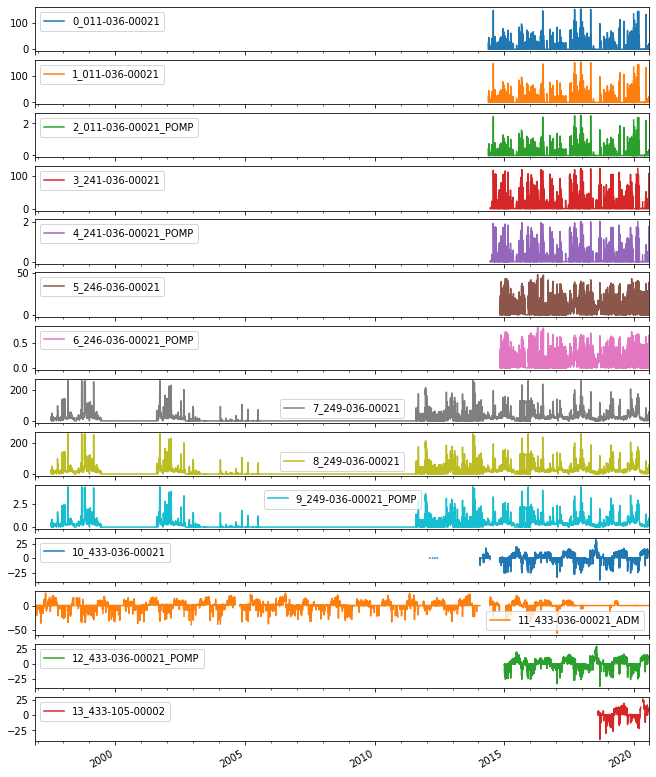

In [15]:
data.resample('d').mean().plot(subplots=True, figsize=(11, 15));

In [16]:
data.columns

Index(['0_011-036-00021', '1_011-036-00021', '2_011-036-00021_POMP',
       '3_241-036-00021', '4_241-036-00021_POMP', '5_246-036-00021',
       '6_246-036-00021_POMP', '7_249-036-00021', '8_249-036-00021',
       '9_249-036-00021_POMP', '10_433-036-00021', '11_433-036-00021_ADM',
       '12_433-036-00021_POMP', '13_433-105-00002'],
      dtype='object')

In [17]:
df.columns[:-1] + ['433-105-00001']

NameError: name 'df' is not defined

In [18]:
df = data[['0_011-036-00021', '3_241-036-00021', '5_246-036-00021', '7_249-036-00021', '10_433-036-00021', '13_433-105-00002']] # handmatig juiste kolommen selecteren, twijfel over 433-036
df = df.rename(columns={'13_433-105-00002': '13_433-105-00001'}) # 00002 bestaat niet 00001 wel, dit is alleen geen debiet station?

In [19]:
import folium
from folium.plugins import MarkerCluster

# initiate map
m = folium.Map(location=[52.05, 4.6], zoom_start=12, tiles='cartodbpositron')
shps = shps[shps.CODE.isin([CODE for CODE in shps.CODE if any(df.columns.str.contains(CODE))])]
# add markers one-by-one
for point in shps.itertuples():
    folium.Marker([point.geometry.y, point.geometry.x], tooltip=folium.Tooltip('<table><tr style="text-align: left;"><th style="padding: 4px; padding-right: 10px;">code: </th><td style="padding: 4px;">{}</td></tr><tr style="text-align: left;"><th style="padding: 4px; padding-right: 10px;">naam</th><td style="padding: 4px;">{}</td></tr></table>'.format(point.CODE, point.NAAM)), icon=folium.Icon(color='red', icon='square', prefix='fa')).add_to(m)

m.save('meetpunten.html')
m

In [20]:
naamdict = dict(zip(shps.CODE, shps.NAAM))
naamdict

{'433-036-00021': 'Boezemgemaal Gouda',
 '011-036-00021': 'Gemaal Bloemendaal',
 '249-036-00021': 'Gemaal De Omringdijk',
 '246-036-00021': 'Gemaal Middelburg',
 '241-036-00021': 'Gemaal Th. Brans',
 '433-105-00001': 'Meetlocatie Boskoop - Hefbrug'}

In [21]:
df.columns = [column.split('_')[1] for column in df.columns]
df = df.rename(columns=naamdict)

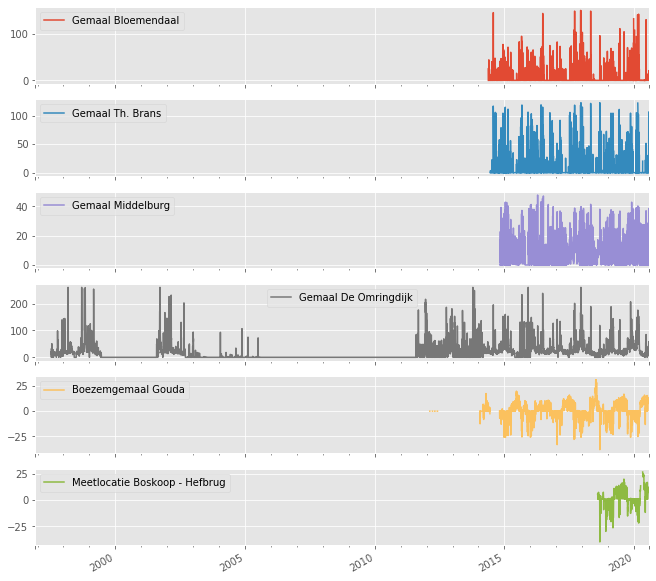

In [22]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df.resample('d').mean().plot(subplots=True, figsize=(11,11));

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027C2C3D6438>,
      dtype=object)

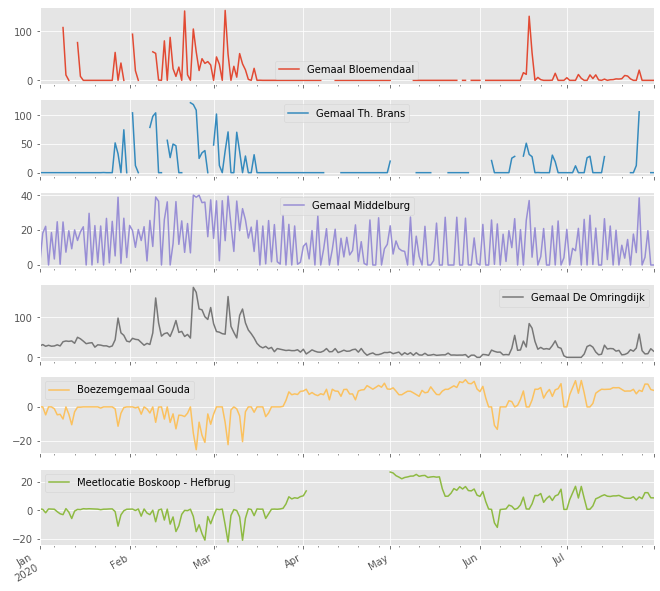

In [23]:
df.resample('d').mean()['2020'].plot(subplots=True, figsize=(11,11))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027C2D026C18>,
      dtype=object)

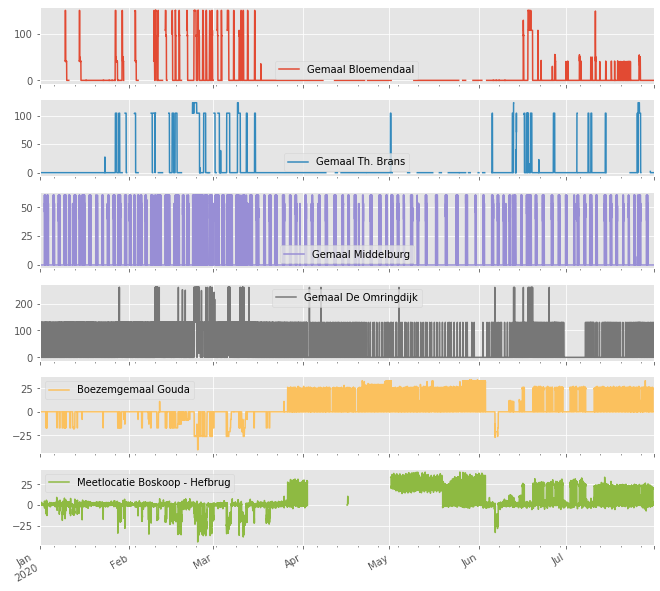

In [24]:
df['2020'].plot(subplots=True, figsize=(11,11))

In [25]:
df.to_csv('csv/debiet.csv')